In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [223]:
my_data = pd.read_csv("G:\mozhgan_python\heart.csv")
my_data[0:10]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


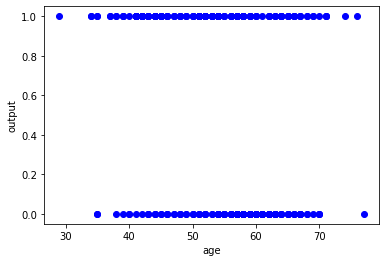

In [46]:
plt.scatter(my_data.age, my_data.output,  color='blue')
plt.xlabel("age")
plt.ylabel("output")
plt.show()

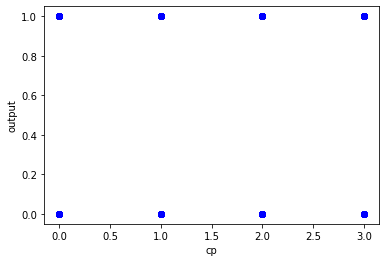

In [47]:
plt.scatter(my_data.cp, my_data.output,  color='blue')
plt.xlabel("cp")
plt.ylabel("output")
plt.show()

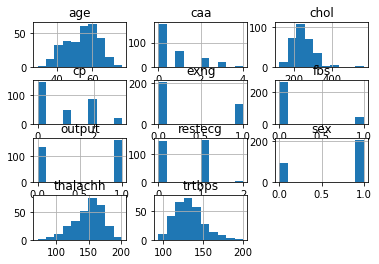

In [48]:
viz=my_data[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg','thalachh','exng','caa','output']].hist()


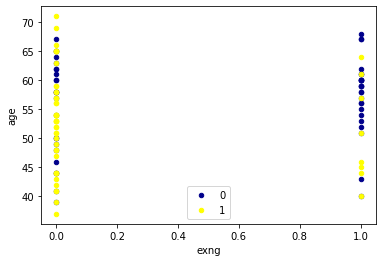

In [142]:
ax = my_data[my_data['output'] == 0][0:50].plot(kind='scatter', x='exng', y='age', color='DarkBlue', label='0');
my_data[my_data['output'] == 1][0:50].plot(kind='scatter', x='exng', y='age', color='Yellow', label='1', ax=ax);
plt.show()

In [3]:
my_data.shape

(303, 14)

In [5]:
my_data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### # Classification_SVM with all the Features

In [248]:
feature = my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [249]:
y = np.asarray(my_data['output'])

y [0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [250]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.95,  0.68,  1.97,  0.76, -0.26,  2.39, -1.01,  0.02, -0.7 ,
         1.09, -2.27, -0.71, -2.15],
       [-1.92,  0.68,  1.  , -0.09,  0.07, -0.42,  0.9 ,  1.63, -0.7 ,
         2.12, -2.27, -0.71, -0.51],
       [-1.47, -1.47,  0.03, -0.09, -0.82, -0.42, -1.01,  0.98, -0.7 ,
         0.31,  0.98, -0.71, -0.51],
       [ 0.18,  0.68,  0.03, -0.66, -0.2 , -0.42,  0.9 ,  1.24, -0.7 ,
        -0.21,  0.98, -0.71, -0.51],
       [ 0.29, -1.47, -0.94, -0.66,  2.08, -0.42,  0.9 ,  0.58,  1.44,
        -0.38,  0.98, -0.71, -0.51]])

In [251]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [252]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])

[0 0 1 1 0 0 0 1 1 1]


In [253]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [254]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Confusion matrix, without normalization
[[24  1]
 [ 7 29]]


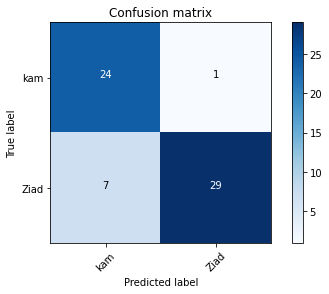

In [255]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

In [6]:
my_data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Correlation

In [35]:

my_data['age'].corr(my_data['output'])

-0.22543871587483733

In [29]:
my_data['sex'].corr(my_data['output'])

-0.2809365755017669

In [30]:
my_data['cp'].corr(my_data['output'])

0.43379826150689427

In [36]:
my_data['trtbps'].corr(my_data['output'])

-0.1449311284977516

In [37]:
my_data['chol'].corr(my_data['output'])

-0.08523910513756906

In [38]:
my_data['fbs'].corr(my_data['output'])

-0.028045760272712866

In [39]:
my_data['restecg'].corr(my_data['output'])

0.13722950287377303

In [40]:
my_data['thalachh'].corr(my_data['output'])

0.4217409338106747

In [41]:
my_data['exng'].corr(my_data['output'])

-0.4367570833533031

In [42]:
my_data['oldpeak'].corr(my_data['output'])

-0.4306960016873688

In [43]:
my_data['slp'].corr(my_data['output'])

0.34587707824172487

In [44]:
my_data['caa'].corr(my_data['output'])

-0.3917239923512527

In [45]:
my_data['thall'].corr(my_data['output'])

-0.34402926803831013

### Feature1=exng which has the highest correlation

In [20]:
feature_df1 = my_data[['exng']]
X = np.asarray(feature_df1)
X[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

In [21]:
y = np.asarray(my_data['output'])

y [0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

### Normalization

In [120]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.7 ],
       [-0.7 ],
       [-0.7 ],
       [-0.7 ],
       [ 1.44]])

### Splitting the data to train and test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 1) (242,)
Test set: (61, 1) (61,)


### One- Classification_SVM with feature1(exng)

In [256]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])

[0 0 1 1 0 0 0 1 1 1]


In [257]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [258]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Confusion matrix, without normalization
[[24  1]
 [ 7 29]]


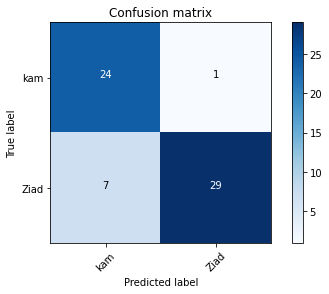

In [259]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

### ### Two- Classification_SVM with feature2('exng','cp','oldpeak','thalachh') which have the correlation more than 0/4

In [29]:
feature_df2 = my_data[['exng','cp','oldpeak','thalachh']]
X = np.asarray(feature_df2)
X[:5]

array([[  0. ,   3. ,   2.3, 150. ],
       [  0. ,   2. ,   3.5, 187. ],
       [  0. ,   1. ,   1.4, 172. ],
       [  0. ,   1. ,   0.8, 178. ],
       [  1. ,   0. ,   0.6, 163. ]])

In [30]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.7 ,  1.97,  1.09,  0.02],
       [-0.7 ,  1.  ,  2.12,  1.63],
       [-0.7 ,  0.03,  0.31,  0.98],
       [-0.7 ,  0.03, -0.21,  1.24],
       [ 1.44, -0.94, -0.38,  0.58]])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 4) (242,)
Test set: (61, 4) (61,)


In [260]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])

[0 0 1 1 0 0 0 1 1 1]


In [261]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [262]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        25
           1       0.97      0.81      0.88        36

    accuracy                           0.87        61
   macro avg       0.87      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61

Confusion matrix, without normalization
[[24  1]
 [ 7 29]]


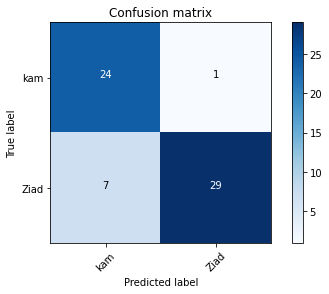

In [263]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

### Correlation between the above four features

In [38]:
my_data['exng'].corr(my_data['cp'])

-0.39428026849502185

In [39]:
my_data['exng'].corr(my_data['oldpeak'])

0.2882228077827655

In [40]:
my_data['exng'].corr(my_data['thalachh'])

-0.37881209385148656

In [43]:
my_data['cp'].corr(my_data['oldpeak'])

-0.14923015809708082

In [44]:
my_data['oldpeak'].corr(my_data['thalachh'])

-0.34418694796671584

In [45]:
my_data['cp'].corr(my_data['thalachh'])

0.29576212458791057

### ### Three- Classification_SVM with feature3('exng','cp') which have the highest correlation

In [264]:
feature_df3 = my_data[['exng','cp']]
X = np.asarray(feature_df3)
X[:5]

array([[0, 3],
       [0, 2],
       [0, 1],
       [0, 1],
       [1, 0]], dtype=int64)

In [265]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.7 ,  1.97],
       [-0.7 ,  1.  ],
       [-0.7 ,  0.03],
       [-0.7 ,  0.03],
       [ 1.44, -0.94]])

In [266]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 2) (242,)
Test set: (61, 2) (61,)


In [267]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])

[0 1 0 1 1 0 0 1 1 1]


In [268]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [269]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        25
           1       0.83      0.83      0.83        36

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

Confusion matrix, without normalization
[[19  6]
 [ 6 30]]


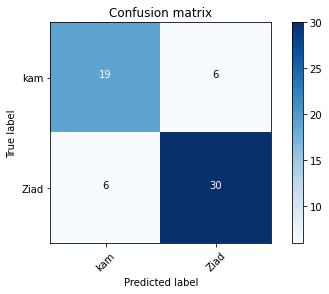

In [270]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

### ### Four- Classification_SVM with feature4('exng','oldpeak') which have the lowest correlation

In [271]:
feature_df4 = my_data[['exng','oldpeak']]
X = np.asarray(feature_df4)
X[:5]

array([[0. , 2.3],
       [0. , 3.5],
       [0. , 1.4],
       [0. , 0.8],
       [1. , 0.6]])

In [272]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.7 ,  1.09],
       [-0.7 ,  2.12],
       [-0.7 ,  0.31],
       [-0.7 , -0.21],
       [ 1.44, -0.38]])

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 2) (242,)
Test set: (61, 2) (61,)


In [274]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
print(yhat [0:10])

[1 1 1 1 1 1 0 1 0 0]


In [275]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [276]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.76      0.52      0.62        25
           1       0.73      0.89      0.80        36

    accuracy                           0.74        61
   macro avg       0.75      0.70      0.71        61
weighted avg       0.74      0.74      0.73        61

Confusion matrix, without normalization
[[13 12]
 [ 4 32]]


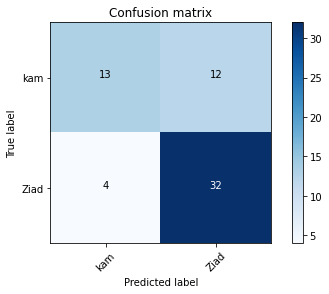

In [277]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

### Five-Classification_LogisticRegression with feature5('exng')

In [301]:
feature5 = my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [303]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [304]:
yhat = LR.predict(X_test)
print(yhat)
print(y_test)

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1]
[1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1]


In [305]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.24, 0.76],
       [0.69, 0.31],
       [0.39, 0.61],
       [0.12, 0.88],
       [0.36, 0.64],
       [0.45, 0.55],
       [0.49, 0.51],
       [0.11, 0.89],
       [0.32, 0.68],
       [0.2 , 0.8 ],
       [0.25, 0.75],
       [0.11, 0.89],
       [0.45, 0.55],
       [0.41, 0.59],
       [0.4 , 0.6 ],
       [0.87, 0.13],
       [0.28, 0.72],
       [0.22, 0.78],
       [0.54, 0.46],
       [0.36, 0.64],
       [0.15, 0.85],
       [0.26, 0.74],
       [0.8 , 0.2 ],
       [0.46, 0.54],
       [0.34, 0.66],
       [0.69, 0.31],
       [0.66, 0.34],
       [0.29, 0.71],
       [0.37, 0.63],
       [0.71, 0.29],
       [0.44, 0.56],
       [0.38, 0.62],
       [0.14, 0.86],
       [0.27, 0.73],
       [0.44, 0.56],
       [0.19, 0.81],
       [0.16, 0.84],
       [0.46, 0.54],
       [0.37, 0.63],
       [0.79, 0.21],
       [0.86, 0.14],
       [0.66, 0.34],
       [0.7 , 0.3 ],
       [0.46, 0.54],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.71, 0.29],
       [0.38,

In [306]:
yhat_prob.shape

(61, 2)

In [307]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=0)

0.5925925925925926

In [308]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,pos_label=1)

0.7555555555555555

In [309]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 9 16]]


Confusion matrix, without normalization
[[34  2]
 [ 9 16]]


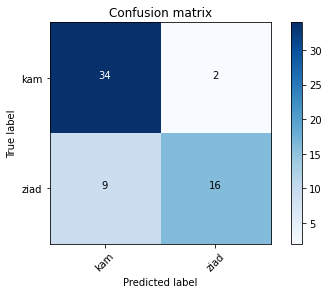

In [310]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','ziad'],normalize= False,  title='Confusion matrix')

In [311]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.64      0.74        25
           1       0.79      0.94      0.86        36

    accuracy                           0.82        61
   macro avg       0.84      0.79      0.80        61
weighted avg       0.83      0.82      0.81        61



In [312]:
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.43356169910511694

### Six-Classification_KNeighborsClassifier with feature6('exng')

In [324]:
feature6 = my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [325]:
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
print(X[0:5])

[[ 0.95  0.68  1.97  0.76 -0.26  2.39 -1.01  0.02 -0.7   1.09 -2.27 -0.71
  -2.15]
 [-1.92  0.68  1.   -0.09  0.07 -0.42  0.9   1.63 -0.7   2.12 -2.27 -0.71
  -0.51]
 [-1.47 -1.47  0.03 -0.09 -0.82 -0.42 -1.01  0.98 -0.7   0.31  0.98 -0.71
  -0.51]
 [ 0.18  0.68  0.03 -0.66 -0.2  -0.42  0.9   1.24 -0.7  -0.21  0.98 -0.71
  -0.51]
 [ 0.29 -1.47 -0.94 -0.66  2.08 -0.42  0.9   0.58  1.44 -0.38  0.98 -0.71
  -0.51]]


In [326]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 13) (242,)
Test set: (61, 13) (61,)


In [327]:
from sklearn.neighbors import KNeighborsClassifier

In [328]:
from sklearn import metrics
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.77, 0.77, 0.8 , 0.8 , 0.8 , 0.82, 0.84, 0.82, 0.82])

In [335]:
k = 10
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=10)

In [336]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y[0:5])

[0 0 1 1 0]
[1 1 1 1 1]


In [337]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8388429752066116
Test set Accuracy:  0.8524590163934426


In [321]:
k = 9
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

In [322]:
yhat = neigh.predict(X_test)
print(yhat[0:5])
print(y_test[0:5])

[1 1 1 1 1]
[1 0 1 1 0]


In [323]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.6983471074380165
Test set Accuracy:  0.8032786885245902


### Seven-Classification_DecisionTrees with feature7('exng')

In [110]:
feature_df7 = my_data[['exng']]
X = np.asarray(feature_df7)
X[:5]

array([[0],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

In [111]:
scaler = preprocessing.StandardScaler().fit(X)
X=scaler.transform(X.astype(float))
print(X[0:5])

[[-0.7 ]
 [-0.7 ]
 [-0.7 ]
 [-0.7 ]
 [ 1.44]]


In [112]:
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.2, random_state=4)

In [114]:
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [115]:
drugTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [116]:
predTree = drugTree.predict(X_testset)

In [117]:
print (predTree [0:5])
print (y_testset [0:5])

[1 1 1 1 1]
[1 0 1 1 0]


In [118]:
from sklearn import metrics
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.8032786885245902


In [209]:
feature = my_data[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']]
X = np.asarray(feature)
X[:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [147]:
from sklearn.feature_selection import VarianceThreshold
>>> X = np.asarray(feature)
>>> sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
>>> b=sel.fit_transform(X)
print(b)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]


In [148]:
b.shape

(303, 12)

In [150]:
X.shape

(303, 13)

In [211]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X_new = SelectKBest(f_classif, k=1).fit_transform(X, y)

In [212]:
X_new.shape

(303, 1)

In [213]:
y = np.asarray(my_data['output'])

In [214]:
y.shape

(303,)

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (242, 1) (242,)
Test set: (61, 1) (61,)


In [216]:
from sklearn import svm
kernels=['rbf','linear','poly', 'sigmoid']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    print(yhat [0:10])

[1 1 1 1 1 1 0 1 0 0]
[1 1 1 1 1 1 0 1 0 0]
[1 1 1 1 1 1 0 1 0 0]
[1 1 1 1 1 1 0 1 0 0]


In [217]:
y_test[0:10]

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [219]:
from sklearn import svm
kernels=['rbf']
for kernel in kernels:
    clf = svm.SVC(kernel=kernel)
    clf.fit(X_train, y_train) 
    yhat = clf.predict(X_test)
    print(yhat [0:10])

[1 1 1 1 1 1 0 1 0 0]


In [220]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [221]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.84      0.64      0.73        25
           1       0.79      0.92      0.85        36

    accuracy                           0.80        61
   macro avg       0.81      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61

Confusion matrix, without normalization
[[16  9]
 [ 3 33]]


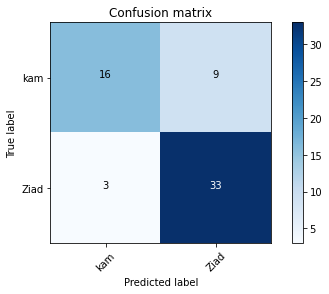

In [222]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['kam','Ziad'],normalize= False,  title='Confusion matrix')

In [205]:
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
selector = VarianceThreshold()
selector.fit_transform(X)

array([[2, 0],
       [1, 4],
       [1, 1]])

In [345]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1.0,
max_depth=5, random_state=2).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8852459016393442